## RNN+LSTM Model to Predict JPM Stock Price
This code was partially adopted from https://www.kaggle.com/bunny01/predict-stock-price-of-apple-inc-with-lstm

In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# parameters to be set ("optimum" hyperparameters obtained from grid search):
look_back = 7
epochs = 400
batch_size = 32

In [4]:
np.random.seed(7)

In [5]:
jpm = pd.read_csv('C:/Users/Heidi/Desktop/MMAI Course/894 Deep Learning/Project/0.0-sh-data-JPM.csv')

In [6]:
# reshape to column vector
price_close=jpm['Adj_Close'].values.astype('float32')
df = price_close.reshape(len(price_close), 1)

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [84]:
# split data into training set and test set
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train = df[0:train_size,:] 
test = df[train_size:len(df),:]

print('Split data into training set and test set... Number of training samples/ test samples:', len(train), len(test))

Split data into training set and test set... Number of training samples/ test samples: 2013 504


In [9]:
# convert an array of values into a time series dataset 
# in form 
#                     X                     Y
# t-look_back+1, t-look_back+2, ..., t     t+1

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# convert JP Morgan's stock price data into time series dataset
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [10]:
# reshape input of the LSTM to be format [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [11]:
# create and fit the RNN & LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(x_test, y_test),verbose=2,shuffle=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 2005 samples, validate on 496 samples
Epoch 1/400
 - 1s - loss: 0.0104 - val_loss: 0.1146
Epoch 2/400
 - 0s - loss: 0.0065 - val_loss: 0.0965
Epoch 3/400
 - 0s - loss: 0.0043 - val_loss: 0.0774
Epoch 4/400
 - 0s - loss: 0.0029 - val_loss: 0.0618
Epoch 5/400
 - 0s - loss: 0.0018 - val_loss: 0.0495
Epoch 6/400
 - 0s - loss: 0.0010 - val_loss: 0.0408
Epoch 7/400
 - 0s - loss: 5.4155e-04 - val_loss: 0.0352
Epoch 8/400
 - 0s - loss: 2.8543e-04 - val_loss: 0.0319
Epoch 9/400
 - 0s - loss: 1.8982e-04 - val_loss: 0.0299
Epoch 10/400
 - 0s - loss: 1.6871e-04 - val_loss: 0.0284
Epoch 11/400
 - 0s - loss: 1.7132e-04 - val_loss: 0.0272
Epoch 12/400
 - 0s - loss: 1.7821e-04 - val_loss: 0.0261
Epoch 13/400
 - 0s - loss: 1.8425e-04 - val_loss: 0.0251
Epoch 14/400
 - 0s - loss: 1.8858e-04 - val_loss: 0.0240
Epoch 15/400
 - 0s - loss: 1.9136e-04 - val_loss: 0.0230
Epoch 16/400
 - 0s - loss: 1.9286e-04 - val_loss: 0.0221
Epoch 17/400
 - 0s - loss: 1.9333e-04 - val_loss: 0.0211
Epoch 18/400
 - 0

Epoch 144/400
 - 0s - loss: 1.1049e-04 - val_loss: 0.0011
Epoch 145/400
 - 0s - loss: 1.1024e-04 - val_loss: 0.0011
Epoch 146/400
 - 0s - loss: 1.1000e-04 - val_loss: 0.0010
Epoch 147/400
 - 0s - loss: 1.0976e-04 - val_loss: 0.0010
Epoch 148/400
 - 0s - loss: 1.0951e-04 - val_loss: 9.9371e-04
Epoch 149/400
 - 0s - loss: 1.0927e-04 - val_loss: 9.7433e-04
Epoch 150/400
 - 0s - loss: 1.0903e-04 - val_loss: 9.5527e-04
Epoch 151/400
 - 0s - loss: 1.0879e-04 - val_loss: 9.3657e-04
Epoch 152/400
 - 0s - loss: 1.0855e-04 - val_loss: 9.1813e-04
Epoch 153/400
 - 0s - loss: 1.0831e-04 - val_loss: 9.0008e-04
Epoch 154/400
 - 0s - loss: 1.0807e-04 - val_loss: 8.8228e-04
Epoch 155/400
 - 0s - loss: 1.0784e-04 - val_loss: 8.6479e-04
Epoch 156/400
 - 0s - loss: 1.0760e-04 - val_loss: 8.4764e-04
Epoch 157/400
 - 0s - loss: 1.0737e-04 - val_loss: 8.3076e-04
Epoch 158/400
 - 0s - loss: 1.0714e-04 - val_loss: 8.1425e-04
Epoch 159/400
 - 0s - loss: 1.0690e-04 - val_loss: 7.9803e-04
Epoch 160/400
 - 0s - lo

Epoch 277/400
 - 0s - loss: 5.9260e-05 - val_loss: 4.1061e-04
Epoch 278/400
 - 0s - loss: 5.5773e-05 - val_loss: 2.5717e-04
Epoch 279/400
 - 0s - loss: 5.7405e-05 - val_loss: 3.6777e-04
Epoch 280/400
 - 0s - loss: 5.5173e-05 - val_loss: 2.6771e-04
Epoch 281/400
 - 0s - loss: 5.6597e-05 - val_loss: 3.4094e-04
Epoch 282/400
 - 0s - loss: 5.4864e-05 - val_loss: 2.6747e-04
Epoch 283/400
 - 0s - loss: 5.6180e-05 - val_loss: 3.2149e-04
Epoch 284/400
 - 0s - loss: 5.4636e-05 - val_loss: 2.6162e-04
Epoch 285/400
 - 0s - loss: 5.5964e-05 - val_loss: 3.0597e-04
Epoch 286/400
 - 0s - loss: 5.4436e-05 - val_loss: 2.5314e-04
Epoch 287/400
 - 0s - loss: 5.5882e-05 - val_loss: 2.9293e-04
Epoch 288/400
 - 0s - loss: 5.4258e-05 - val_loss: 2.4410e-04
Epoch 289/400
 - 0s - loss: 5.5932e-05 - val_loss: 2.8380e-04
Epoch 290/400
 - 0s - loss: 5.4120e-05 - val_loss: 2.3596e-04
Epoch 291/400
 - 0s - loss: 5.6026e-05 - val_loss: 2.7482e-04
Epoch 292/400
 - 0s - loss: 5.4006e-05 - val_loss: 2.2840e-04
Epoch 29

In [12]:
# make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [13]:
# invert predictions and targets to unscaled
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [14]:
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 0.76 RMSE
Test Score: 1.49 RMSE


### Visualization of Prediction Results

- The predicted price is very close to actual price, the price difference is within [-3.23, 6.94], but overpriced in general 
  <br/><br/>**Price Difference = Predicted Price - Actual Price**
  <br/>Min = -3.2284393, Max = 6.941948, Mean = 0.7709893
  <br/>Variance = 1.6323318, Standard Deviation = 1.2763388, Sum = 382.4107

In [15]:
# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift predictions of test data for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

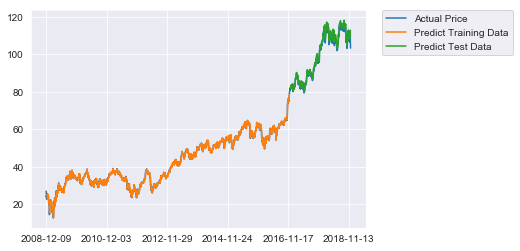

<Figure size 9600x7200 with 0 Axes>

In [120]:
#compare actual stock price vs predicted stock price in both training and test data set
from matplotlib.pyplot import figure
plt.plot(scaler.inverse_transform(df),label="Actual Price")
plt.plot(trainPredictPlot,label='Predict Training Data')
plt.plot(testPredictPlot,label='Predict Test Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(range(0,jpm.shape[0],500),jpm['Date'].loc[::500])
figure(num=None, figsize=(12, 9), dpi=800, facecolor='w', edgecolor='k')
plt.show()

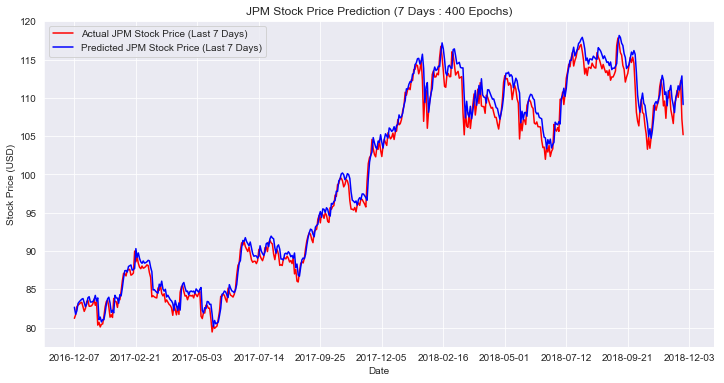

In [121]:
#Compare actual stock price with Predicted Sotck price in the testing window
actual_price=scaler.inverse_transform(df[len(train_predict)+(look_back*2)+1:len(df)-1,:])

date = np.array(jpm['Date'])
test_date = date[train_size:len(df)]

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(actual_price,
         color='red',
         label='Actual JPM Stock Price (Last %s Days)' % look_back)
plt.plot(test_predict,
         color='blue',
         label='Predicted JPM Stock Price (Last %s Days)' % look_back)
plt.title('JPM Stock Price Prediction (%s Days : %s Epochs)' % (look_back, epochs))
plt.xticks(range(0,len(test_date),50),test_date[::50])
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()

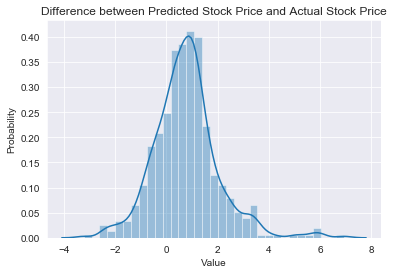

In [82]:
# Histogram of difference between Predicted Stock Price and Actual Stock Priceb

price_difference=test_predict-actual_price

import seaborn as sns

sns.set_style('darkgrid')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Difference between Predicted Stock Price and Actual Stock Price')
maxfreq = n.max()
sns.distplot(price_difference)


In [65]:
import scipy
scipy.stats.describe(price_difference)

DescribeResult(nobs=496, minmax=(array([-3.2284393], dtype=float32), array([6.941948], dtype=float32)), mean=array([0.7709893], dtype=float32), variance=array([1.6323318], dtype=float32), skewness=array([0.807975], dtype=float32), kurtosis=array([2.924078], dtype=float32))

In [123]:
np.sum(price_difference)

382.4107

In [125]:
np.std(price_difference)

1.2763388

## **Model Validation**

### 1. Diagnostic Plots for LSTM

- An **underfit model** is one that is demonstrated to perform well on the training dataset and poor on the test dataset. This can be diagnosed from a plot where the training loss is lower than the validation loss, and the validation loss has a trend that suggests further improvements are possible.

- A **good fit** is a case where the performance of the model is good on both the train and validation sets. This can be diagnosed from a plot where the train and validation loss decrease and stabilize around the same point.

- An **overfit model** is one where performance on the train set is good and continues to improve, whereas performance on the validation set improves to a point and then begins to degrade. This can be diagnosed from a plot where the train loss slopes down and the validation loss slopes down, hits an inflection point, and starts to slope up again.

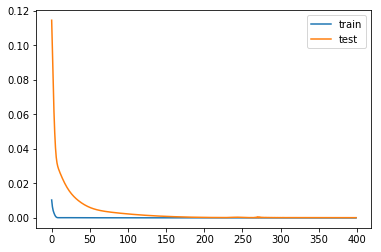

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### 2. Autocorrelation Measurement

#### First calculate Xt - Xt-1 = error term, also called **white noise**, which use the np.diff() function

- **Graph 1 - returns**: process appears to follow random walk and centered about zero
<br/><br/>
- **Autocorrelation & Partial Autocorrelation Plot**: indicate no significant serial correlation. But **some serial correlation** in the ACF, and PACF plots around lags 8, 14, 20, 21, 24 and 30. This means that there should be better models to describe the actual price change process. 
<br/><br/>
- **QQ and Probability Plots**：QQ plot visually assesses whether sample data comes from a specified distribution. For this model, the shape of QQ and Probability plots indicates that the process is close to normality but with **'heavy tails'**. 

This code was adapted from the blog http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

In [20]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

In [21]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

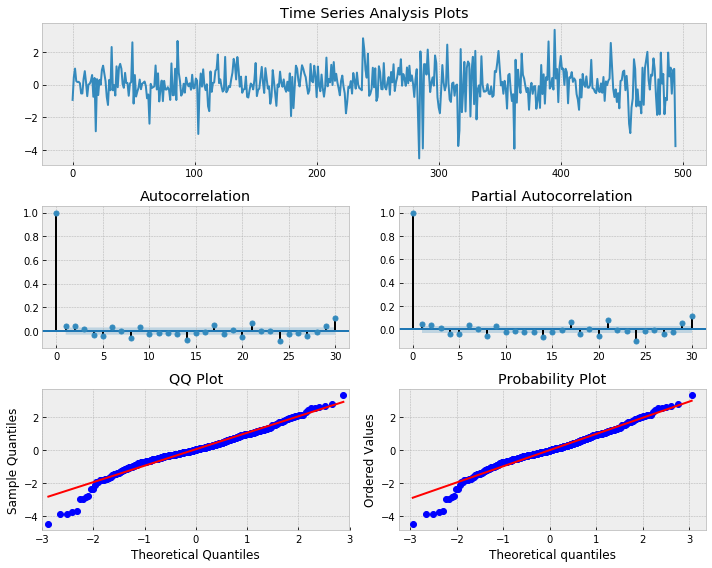

In [23]:
y_a=test_predict.reshape(-1)
tsplot(np.diff(y_a),30)